In [1]:
from __future__ import print_function
import math
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet.gluon import nn
from mxnet.gluon.data.vision import transforms
import numpy as np
%matplotlib inline

In [2]:
def plot_schedule(schedule_fn, iterations=1500):
    # Iteration count starting at 1
    iterations = [i+1 for i in range(iterations)]
    lrs = [schedule_fn(i) for i in iterations]
    plt.scatter(iterations, lrs)
    plt.xlabel("Iteration")
    plt.ylabel("Learning Rate")
    plt.show()

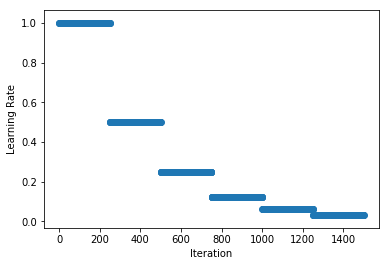

In [6]:
# Stepwise Decay Schedule
schedule = mx.lr_scheduler.FactorScheduler(step=250, factor=0.5)
schedule.base_lr = 1
plot_schedule(schedule)

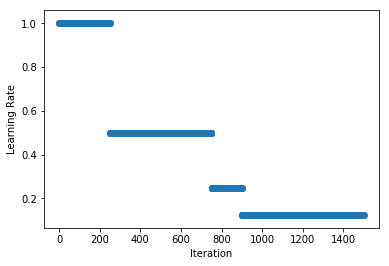

In [5]:
schedule = mx.lr_scheduler.MultiFactorScheduler(step=[250, 750, 900], factor=0.5)
schedule.base_lr = 1
plot_schedule(schedule)

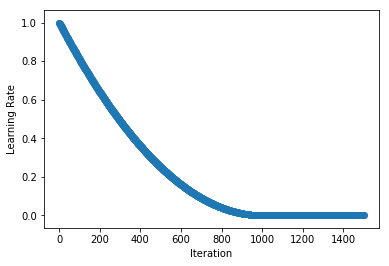

In [7]:
# Polynomial Schedule
schedule = mx.lr_scheduler.PolyScheduler(max_update=1000, base_lr=1, pwr=2)
plot_schedule(schedule)

In [11]:
# Custom Schedules
class CosineAnnealingSchedule():
    def __init__(self, min_lr, max_lr, cycle_length):
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.cycle_length = cycle_length
        
    def __call__(self, iteration):
        if iteration <= self.cycle_length:
            unit_cycle = (1 + math.cos(iteration * math.pi / self.cycle_length)) / 2
            adjusted_cycle = (unit_cycle * (self.max_lr - self.min_lr)) + self.min_lr
            return adjusted_cycle
        else:
            return self.min_lr

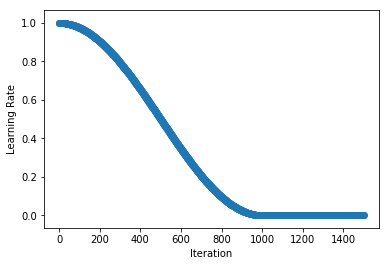

In [9]:
schedule = CosineAnnealingSchedule(min_lr=0, max_lr=1, cycle_length=1000)
plot_schedule(schedule)

In [20]:
# Custom Schedules with Warmup
class CosineAnnealingSchedule_WithWarmup():
    def __init__(self, min_lr, max_lr, cycle_length, warmup=0):
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.cycle_length = cycle_length
        self.warmup = warmup
        
    def __call__(self, iteration):
        if self.warmup > 0 and iteration<=self.warmup:
            lr =  float(self.max_lr - self.min_lr)  * iteration / self.warmup
            if iteration==self.warmup/2:
                print('lr=', lr)
            return lr
        
        elif iteration <= self.cycle_length + self.warmup:
            iteration -= self.warmup
            unit_cycle = (1 + math.cos(iteration * math.pi / self.cycle_length)) / 2
            adjusted_cycle = (unit_cycle * (self.max_lr - self.min_lr)) + self.min_lr
            return adjusted_cycle
        else:
            return self.min_lr

lr= 0.5


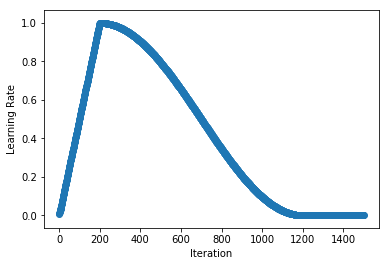

In [21]:
schedule = CosineAnnealingSchedule_WithWarmup(min_lr=0, max_lr=1, cycle_length=1000, warmup=200)
plot_schedule(schedule)